In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def pre(data):
    GPU = data.loc[0]
    memory = data.loc[1]
    GPU =GPU[1:]
    memory =memory[1:]
    GPU= GPU.to_numpy()
    memory = memory.to_numpy()
    #print(GPU.mean(), memory.mean())
    return GPU, memory

In [3]:
def read(i):
    k=["20.0","10.0","50.0","30.0"]
    file_name_adamm="Prob_0.1occupy time10.0Timeout"+k[i]+".csv"
    data = pd.read_csv(file_name_adamm,header=None)
    g, m= pre(data)
    return g.mean(),m.mean()

In [4]:
def get_save_time(g,m):
    position=[]
    save_time=[]
    for i in range(len(m)):
        if m[i]>1:
            position.append(i)
            #print(i)

    for i in range(len(position)-1):
        if position[i+1]-position[i] > 1:
            #print(position[i+1],position[i])
            save_time.append(position[i+1]-position[i])
    
    print(save_time)
    if len(save_time)==0:
        save_time.append(300-position[-1])
    return np.array(save_time)
    #return np.array(save_time).min(),np.array(save_time).mean(),np.array(save_time).max()

In [5]:
def read2(p,x,save):
    P = ["0.1","0.3","0.7"]
    X = ["10.0","15.0","30.0"]
    T=["10.0","500.0"]
    
    if x == 3:
        file_name = "../last/Prob_"+P[p]+"occupy time"+X[2]+"Timeout"+T[1]+".csv"
       
    else:
        file_name = "../last/Prob_"+P[p]+"occupy time"+X[x]+"Timeout"+T[0]+".csv"
    data = pd.read_csv(file_name,header=None)

    g, m = pre(data)
    if save==0:
        return g.mean(),m.mean()
        #return g,m
        #return g, m
    else:
        tmp = get_save_time(g,m)
        return tmp
        #a,b,c=get_save_time(g,m)
        #return a,b,c

In [14]:
#gpus=[]
memorys=[]
#saves=[]
for j in range(4):
    tmp1,tmp2= read(j)
        #gpus.append(tmp1)
    memory.append(tmp2)
        #save_times.append(save_time)
#print(gpus, memory)




In [7]:
tmp=[]
for j in range(3):
    for i in range(3):
        tmp1 = read2(j,i,1)
        #print("Tmp1",tmp1)
        tmp.append(tmp1)
print(tmp)

t=["10","15","30","10","15","30","10","15","30"]
x=["10%","10%","10%","30%","30%","30%","70%","70%","70%"]
data = pd.DataFrame()
for i in range(len(tmp)):
    for j in tmp[i]:
        data=data.append({'Save_time':j,'X':x[i],'T':t[i]},ignore_index=True)
data

[38]
[211]
[]
[34, 12, 17, 17, 38, 11]
[15, 47, 3, 43, 29]
[28, 37]
[9, 4, 16, 15, 5, 26]
[4, 7, 2, 4, 17, 24, 12]
[5]
[array([38]), array([211]), array([103]), array([34, 12, 17, 17, 38, 11]), array([15, 47,  3, 43, 29]), array([28, 37]), array([ 9,  4, 16, 15,  5, 26]), array([ 4,  7,  2,  4, 17, 24, 12]), array([5])]


,Save_time,T,X
0,38.0,10,10%
1,211.0,15,10%
2,103.0,30,10%
3,34.0,10,30%
4,12.0,10,30%
5,17.0,10,30%
6,17.0,10,30%
7,38.0,10,30%
8,11.0,10,30%
9,15.0,15,30%


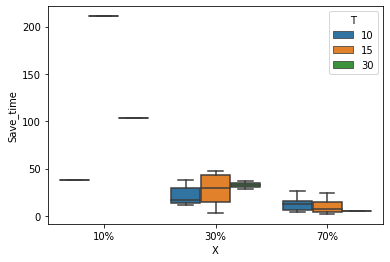

In [8]:
sns.boxplot(x="X",y="Save_time",hue="T",data=data)
plt.show()

In [9]:
stds=[0,0,0,11.571517,18.568791,6.363961,8.264381,8.103497,0]
means=[39,212,104,22.5,28.4,33.5,13.5,11.0,6.0]
data2=data.groupby(["T","X"]).std()
print(data2)
mins=[]
data2["Save_time"][8]

for i in range(9):
    mins.append(data2["Save_time"][i])
stds

        Save_time
T  X             
10 10%        NaN
   30%  11.571517
   70%   8.264381
15 10%        NaN
   30%  18.568791
   70%   8.103497
30 10%        NaN
   30%   6.363961
   70%        NaN


[0, 0, 0, 11.571517, 18.568791, 6.363961, 8.264381, 8.103497, 0]

In [10]:
label=["X=10%","X=30%","X=70%"]
#label=['X=10','X=15','X=30']
y_pos=np.arange(len(label))

p1=plt.bar(y_pos+0, [s_max[0],s_max[3],s_max[6],s_max[9]],width=0.2,color="b",alpha=0.2)
p2=plt.bar(y_pos+0, [s_min[0],s_min[3],s_min[6],s_min[9]],width=0.2,color="b",alpha=0.5)

p3=plt.bar(y_pos+0.2,[s_max[1],s_max[4],s_max[7],s_max[10]],width=0.2,color="g",alpha=0.2)
p4=plt.bar(y_pos+0.2, [s_min[1],s_min[4],s_min[7],s_min[10]],width=0.2,color="g",alpha=0.5)

p5=plt.bar(y_pos+0.4, [s_max[2],s_max[5],s_max[8],s_max[11]],width=0.2,color="r",alpha=0.2)
p6=plt.bar(y_pos+0.4, [s_min[2],s_min[5],s_min[8],s_min[11]],width=0.2,color="r",alpha=0.5)

"""
plt.scatter(y_pos+0, [s_max[0],s_max[3],s_max[6],s_max[9]])
plt.scatter(y_pos+0.2, [s_max[1],s_max[4],s_max[7],s_max[10]])
plt.scatter(y_pos+0.4, [s_max[2],s_max[5],s_max[8],s_max[11]])

plt.plot(y_pos+0, [s_min[0],s_min[3],s_min[6],s_min[9]])
plt.plot(y_pos+0.2, [s_min[1],s_min[4],s_min[7],s_min[10]])
plt.plot(y_pos+0.4, [s_min[2],s_min[5],s_min[8],s_min[11]])
"""
plt.xticks(y_pos+0.2, label)
plt.ylabel("second")
plt.legend([p2[0],p4[0],p6[0]],["T=10", "T=15","T=30"])
plt.show()
plt.savefig('Min_save_time.png')


NameError: name 's_max' is not defined

[0, 0, 0, 11.571517, 18.568791, 6.363961, 8.264381, 8.103497, 0]


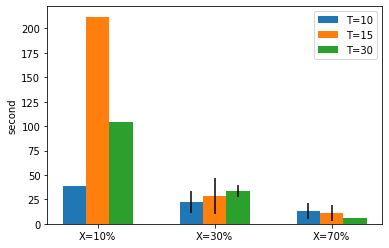

<Figure size 432x288 with 0 Axes>

In [11]:
label=["X=10%","X=30%","X=70%"]
print(stds)

#label=['X=10','X=15','X=30']
y_pos=np.arange(len(label))
plt.bar(y_pos+0, [means[0],means[3],means[6]],width=0.2,yerr=[stds[0],stds[3],stds[6]])
plt.bar(y_pos+0.2,[means[1],means[4],means[7]],width=0.2,yerr=[stds[1],stds[4],stds[7]])
plt.bar(y_pos+0.4, [means[2],means[5],means[8]],width=0.2,yerr=[stds[2],stds[5],stds[8]])

plt.xticks(y_pos+0.2, label)
plt.ylabel("second")
plt.legend(["T=10", "T=15","T=30"])
plt.show()
plt.savefig('Min_save_time.png')

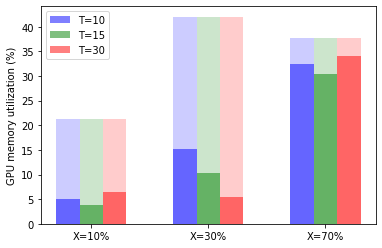

<Figure size 432x288 with 0 Axes>

In [11]:
label=["X=10%","X=30%","X=70%"]
#label=['X=10','X=15','X=30']
y_pos=np.arange(len(label))

p1=plt.bar(y_pos+0, [memory[3],memory[7],memory[11]],width=0.2,color="blue",alpha=0.2)
p2=plt.bar(y_pos+0, [memory[0],memory[4],memory[8]],width=0.2,color="blue",alpha=0.5)

p3=plt.bar(y_pos+0.2, [memory[3],memory[7],memory[11]],width=0.2,color="green",alpha=0.2)
p4=plt.bar(y_pos+0.2, [memory[1],memory[5],memory[9]],width=0.2,color="green",alpha=0.5)

p5=plt.bar(y_pos+0.4, [memory[3],memory[7],memory[11]],width=0.2,color="red",alpha=0.2)
p6=plt.bar(y_pos+0.4, [memory[2],memory[6],memory[10]],width=0.2,color="red",alpha=0.5)


plt.xticks(y_pos+0.2, label)
plt.ylabel("GPU memory utilization (%)")
plt.legend([p2[0],p4[0],p6[0]],["T=10", "T=15","T=30"])
plt.show()
plt.savefig('avg_gpu.png')


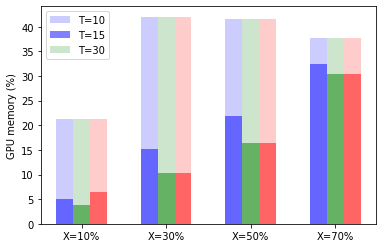

<Figure size 432x288 with 0 Axes>

In [32]:
plt.bar(y_pos+0, [memory[3],memory[7],memory[11],memory[15]], yeer=std,width=0.2,color="blue",alpha=0.2)
plt.bar(y_pos+0, [memory[0],memory[4],memory[8],memory[12]],width=0.2,color="blue",alpha=0.5)

plt.bar(y_pos+0.2, [memory[3],memory[7],memory[11],memory[15]],width=0.2,color="green",alpha=0.2)
plt.bar(y_pos+0.2, [memory[1],memory[5],memory[9],memory[13]],width=0.2,color="green",alpha=0.5)

plt.bar(y_pos+0.4, [memory[3],memory[7],memory[11],memory[15]],width=0.2,color="red",alpha=0.2)
plt.bar(y_pos+0.4, [memory[2],memory[5],memory[9],memory[13]],width=0.2,color="red",alpha=0.5)


plt.xticks(y_pos+0.2, label)
plt.ylabel("GPU memory (%)")
plt.legend(["T=10", "T=15","T=30"])
plt.show()
plt.savefig('avg_gpu.png')


In [21]:
#fd, without fd,  baseline with fd Baseline without fd,
gpus=[]
memorys=[]
systems = ["Proposed AdaMM", "Proposed AdaMM without frame differencing" , "Proposed without adptive process management", "Baseline"]
for i in range(4):
    tmp1, tmp2 = read(i)
    gpus.append(tmp1)
    memorys.append(tmp2)
gpus,memorys

([0.5705329153605015,
  13.836990595611285,
  0.3730407523510972,
  10.501567398119123],
 [21.813687261349557,
  27.535603844103317,
  42.30650913192558,
  43.45332830969668])

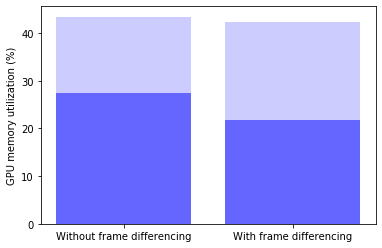

<Figure size 432x288 with 0 Axes>

In [25]:
alpha =0.7

p1 = plt.bar(["Without frame differencing", "With frame differencing"],[memorys[3],memorys[2]], color="blue",alpha=0.2)
p2 = plt.bar(["Without frame differencing", "With frame differencing"],[memorys[1],memorys[0]],color="blue",alpha=0.5)

#plt.title("Average GPU memory utilization on systems")
#plt.legend((p1[0],p2[0]),("Without adaptive process management"))
plt.ylabel("GPU memory utilization (%)")
plt.show()
plt.savefig("AverageGPU_FD.png")

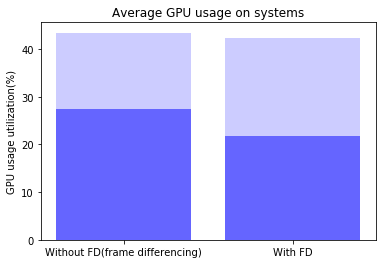

<Figure size 432x288 with 0 Axes>

In [24]:
alpha =0.7

p1 = plt.bar(["Without FD(frame differencing)", "With FD"],[memorys[3],memorys[2]], color="blue",alpha=0.2)
p2 = plt.bar(["Without FD(frame differencing)", "With FD"],[memorys[1],memorys[0]],color="blue",alpha=0.5)

plt.title("Average GPU usage on systems")
#plt.legend((p1[0],p2[0]),("Without adaptive process management"))
plt.ylabel("GPU usage utilization(%)")
plt.show()
plt.savefig("AverageGPU_FD.png")